In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("HR_comma_sep.csv")
df.head()
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1312,0.10,0.92,5,272,4,0,1,0,sales,medium
5926,0.26,0.43,4,215,4,1,0,0,support,low
11222,0.97,0.84,4,177,6,0,0,0,technical,low
6242,0.94,0.76,3,257,4,1,0,0,management,low
12204,0.87,0.90,5,254,6,0,1,0,support,low
5411,0.20,0.51,2,163,2,0,0,0,product_mng,low
3209,0.93,0.66,4,242,4,0,0,0,support,low
8773,0.97,0.69,4,134,3,0,0,0,RandD,high
9269,0.68,0.74,3,227,2,0,0,0,technical,medium
12159,0.45,0.45,2,132,3,0,1,0,marketing,low


In [2]:
df.describe()
# df.info()
# df.shape
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df = pd.get_dummies(df)
df
import seaborn as sn
cor = df.corr()
cor = np.abs(cor)
print(cor)


                        satisfaction_level  last_evaluation  number_project  \
satisfaction_level                1.000000         0.105021        0.142970   
last_evaluation                   0.105021         1.000000        0.349333   
number_project                    0.142970         0.349333        1.000000   
average_montly_hours              0.020048         0.339742        0.417211   
time_spend_company                0.100866         0.131591        0.196786   
Work_accident                     0.058697         0.007104        0.004741   
left                              0.388375         0.006567        0.023787   
promotion_last_5years             0.025605         0.008684        0.006064   
Department_IT                     0.006373         0.001269        0.003287   
Department_RandD                  0.006615         0.005471        0.009703   
Department_accounting             0.028649         0.002193        0.004189   
Department_hr                     0.012841         0

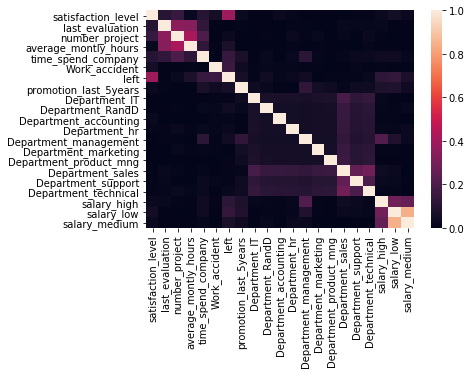

In [4]:
sn.heatmap(cor)

In [5]:
tm = df.groupby("left").mean()
# print(df.columns)
# tm
df.groupby("left")["time_spend_company"].describe()
df.groupby("left")["average_montly_hours"].describe()
tm

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
left,,,,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021,0.101068,0.450123,0.448810
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183,0.022963,0.608233,0.368804


In [6]:
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v1-v2)/(v1+v2))

satisfaction_level        0.204815
last_evaluation           0.001841
number_project            0.009008
average_montly_hours      0.020564
time_spend_company        0.068417
Work_accident             0.574284
promotion_last_5years     0.662952
Department_IT             0.043957
Department_RandD          0.264685
Department_accounting     0.073896
Department_hr             0.135348
Department_management     0.298450
Department_marketing      0.004104
Department_product_mng    0.052597
Department_sales          0.018683
Department_support        0.029600
Department_technical      0.048796
salary_high               0.629723
salary_low                0.149393
salary_medium             0.097853
dtype: float64

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
df = pd.read_csv("HR_comma_sep.csv")
df.drop(["last_evaluation", "number_project"], axis = "columns", inplace = True)
df["salary"].replace(["low", "medium", "high"], [1, 2, 3], inplace = True)
df = pd.get_dummies(df)

In [8]:
from sklearn.model_selection import train_test_split
y = df.left
df.drop("left", axis="columns", inplace=True)
X = df

In [63]:
# model = LogisticRegression()
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
from sklearn.metrics import confusion_matrix
yp = model.predict(X_test)
yp

X["average_montly_hours"] = pd.cut(X["average_montly_hours"], bins = [0,150,200,1000], labels = [2,1,3])
X["time_spend_company"] = pd.cut(X["time_spend_company"], bins=[0,2,5, 1000], labels = [3,2,1])

print("left", sum(yp!=0))
print("not left", sum(yp==0))
cm = confusion_matrix(y_test, yp)
cm

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.906
left 680
not left 2320


array([[2154,  116],
       [ 166,  564]], dtype=int64)